#                                               TWITTER DATA ANALYSIS 
#   ( DATA EXTRACTION , SENTIMENT ANALYSIS , TIME-SERIES ANALYSIS)

In [1]:
import pandas as pd
tweets=pd.read_csv("tweets.csv",encoding="ISO-8859-1") 

In [2]:
tweets.head()

Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   
3           4  4  RT @ANI_news: Gurugram (Haryana): Post office ...   
4           5  5  RT @satishacharya: Reddy Wedding! @mail_today ...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   
3      False              0       NaN  2016-11-23 18:39:59      False   
4      False              0       NaN  2016-11-23 18:39:39      False   

   replyToSID            id  replyToUID  \
0         NaN  8.014957e+17         NaN   
1         NaN  8.014957e+17         NaN   
2         NaN  8.014955e+17         NaN   
3         NaN  8.014955e+17         NaN   
4         NaN  8.014954e+17         NaN   

                                        statusSource       screenName  \
0  <a href="http://twitter.com/download/android" ...  HASHTAGFARZIWAL   
1  <a href="http://twitter.com/download/android" ...   PRAMODKAUSHIK9   
2  <a href="http://twitter.com/download/android" ...  rahulja13034944   
3  <a href="http://twitter.com/download/android" ...        deeptiyvd   
4  <a href="http://cpimharyana.com" rel="nofollow...        CPIMBadli   

   retweetCount  isRetweet  retweeted  
0           331       True      False  
1            66       True      False  
2            12       True      False  
3           338       True      False  
4           120       True      False

In [3]:
# in this type of data sets our main focus is on text column 

tweets["text"].head()

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @Hemant_80: Did you vote on #Demonetization...
2    RT @roshankar: Former FinSec, RBI Dy Governor,...
3    RT @ANI_news: Gurugram (Haryana): Post office ...
4    RT @satishacharya: Reddy Wedding! @mail_today ...
Name: text, dtype: object

In [4]:
# lets clean our text
## preprocess

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words= nltk.corpus.stopwords.words('english')


nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem= WordNetLemmatizer()

import re

import string
punc=string.punctuation

def clean(text):
    
    #--------------------------------------------------------------------------------------------
    
    text=text.lower()                                          #(to make he full text in lowercase)
    
    #---------------------------------------------------------------------------------------------
    
    text=re.sub('[^A-Za-z]+'," ",text)                         #(to remove special symbols and numeric values)
    
    #---------------------------------------------------------------------------------------------
    
    text =re.sub('RT|rt|cc', '', text)                           # remove RT and cc
    
    #----------------------------------------------------------------------------------------------
    
    text="".join(x for x in text if x not in punc)             #(to remove punctuations such as full stop, comma, and brackets)
    
    # we can also do it in this manner
      #  text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  # remove punctuations
    
    #--------------------------------------------------------------------------------------------
    
    text_cleaned=""                                             #(to remove stopword like (it ,is ,a))
    
    y=text.split()
    for word in y:
        if word in stop_words:
            pass
        else:
            text_cleaned +=" "
            text_cleaned += word
    
    #----------------------------------------------------------------------------------------------
    
    text_cleaned1=""                                              #(to perform lemmatization , pos='verb')
    z=text_cleaned.split()
    for l_words in z:
        l_words=lem.lemmatize(l_words,pos='v')
        text_cleaned1 +=" "
        text_cleaned1 += l_words
        
    #----------------------------------------------------------------------------------------------
    
    text=text_cleaned1.strip()                                     #(to remove extra whitespace)
    text
    
    # we can also do it in this manner
    # text = re.sub('\s+', ' ', text)  # remove extra whitespace
        
    #----------------------------------------------------------------------------------------------
    
    return text




clean("it is Raining heavily today 897 on wed@")                               #(checking function)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading snowball: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


'rain heavily today wed'

In [5]:
# lets check the function again
#clean("hello Dear How ! are # you Doing?")  -------------- issue :not taking after Dear ---output (hello dear)
clean("hi hello G ! hdihjfei @@@ IDHk # IHShjhj")

'hi hello g hdihjfei idhk ihshjhj'

In [6]:
tweets['cleaned']=tweets["text"].apply(clean)

In [7]:
tweets[['text','cleaned']]

text  \
0      RT @rssurjewala: Critical question: Was PayTM ...   
1      RT @Hemant_80: Did you vote on #Demonetization...   
2      RT @roshankar: Former FinSec, RBI Dy Governor,...   
3      RT @ANI_news: Gurugram (Haryana): Post office ...   
4      RT @satishacharya: Reddy Wedding! @mail_today ...   
5      @DerekScissors1: Indias #demonetization: #Bla...   
6      RT @gauravcsawant: Rs 40 lakh looted from a ba...   
7      RT @Joydeep_911: Calling all Nationalists to j...   
8      RT @sumitbhati2002: Many opposition leaders ar...   
9      National reform now destroyed even the essence...   
10     Many opposition leaders are with @narendramodi...   
11     RT @Joydas: Question in Narendra Modi App wher...   
12     @Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00...   
13     RT @Atheist_Krishna: The effect of #Demonetiza...   
14     RT @sona2905: When I explained #Demonetization...   
15     RT @Dipankar_cpiml: The Modi app on #DeMonetiz...   
16     RT @roshankar: Former FinSec, RBI Dy Governor,...   
17     RT @Atheist_Krishna: BEFORE and AFTER Gandhi j...   
18     RT @pGurus1: #Demonetization The co-operative ...   
19     RT @roshankar: Former FinSec, RBI Dy Governor,...   
20     RT @Hemant_80: Did you vote on #Demonetization...   
21     RT @roshankar: Former FinSec, RBI Dy Governor,...   
22     RT @Atheist_Krishna: BEFORE and AFTER Gandhi j...   
23     RT @MahikaInfra: @narendramodi\r\n@Swamy39\r\n...   
24     RT @Hemant_80: Did you vote on #Demonetization...   
25     RT @roshankar: Former FinSec, RBI Dy Governor,...   
26     RT @kapil_kausik: #Doltiwal I mean #JaiChandKe...   
27     RT @roshankar: Former FinSec, RBI Dy Governor,...   
28     RT @kapil_kausik: #Doltiwal I mean #JaiChandKe...   
29     RT @AAPVind: #Demonetization Is Disaster!  @na...   
...                                                  ...   
14910  RT @rahulroushan: Prohibition is Demonetizatio...   
14911  RT @rahulroushan: Prohibition is Demonetizatio...   
14912  RT @rahulroushan: Prohibition is Demonetizatio...   
14913  RT @rahulroushan: Prohibition is Demonetizatio...   
14914  RT @hindustanse: #Mind_it.....Arnab Goswami sl...   
14915  RT @rahulroushan: Prohibition is Demonetizatio...   
14916  As someone who is trying to break into interne...   
14917  RT @bharat_builder: Lol. Demonetization has fi...   
14918  RT @rahulroushan: Prohibition is Demonetizatio...   
14919  RT @rahulroushan: Prohibition is Demonetizatio...   
14920  RT @rahulroushan: Prohibition is Demonetizatio...   
14921  RT @rahulroushan: Prohibition is Demonetizatio...   
14922  RT @rahulroushan: Prohibition is Demonetizatio...   
14923  RT @rahulroushan: Prohibition is Demonetizatio...   
14924  RT @rahulroushan: Prohibition is Demonetizatio...   
14925  @moneycontrolcom Who wrote this article? You g...   
14926  RT @rahulroushan: Prohibition is Demonetizatio...   
14927  RT @rahulroushan: Prohibition is Demonetizatio...   
14928  RT @rahulroushan: Prohibition is Demonetizatio...   
14929  RT @rahulroushan: Prohibition is Demonetizatio...   
14930  RT @rahulroushan: Prohibition is Demonetizatio...   
14931  RT @bharat_builder: Lol. Demonetization has fi...   
14932  Can cash -- or the end of cash -- end poverty ...   
14933  @thehill To The Hill. Shame on you for your an...   
14934  RT @Vidyut: How India became Bill Gates' guine...   
14935  RT @saxenavishakha: Ghost of demonetization re...   
14936  N d modi fans-d true nationalists of the count...   
14937  RT @bharat_builder: Lol. Demonetization has fi...   
14938  RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...   
14939  @Vidyut B team of BJP. CIA baby. CCTV, EVM but...   

                                                 cleaned  
0      rssurjewala critical question paytm inform dem...  
1             hemant vote demonetization modi survey app  
2      roshankar former finsec rbi dy governor cbdt c...  
3      ani news gurugram haryana post office employee...  
4      satishacharya reddy wed mail 

In [8]:
#Sentence Tokenization 
#Sentence tokenizer breaks text paragraph into sentences.

nltk.download('punkt')
from nltk.tokenize import word_tokenize
complete_text=" ".join(tweets['cleaned'])
tokenized_text=nltk.sent_tokenize(complete_text)

print(tokenized_text)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['rssurjewala critical question paytm inform demonetization edict pm clearly fishy require full disclosure amp hemant vote demonetization modi survey app roshankar former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization aam aadmi listen th ani news gurugram haryana post office employees provide cash exchange patients hospitals demonetization https co ugmxup satishacharya reddy wed mail today caoon demonetization reddywedding https co u glnrq f derekscissors india demonetization blackmoney symptom disease https co hsl ihj qe via ambazaarmag gauravcsawant rs lakh loot bank kishtwar j amp k third incident since demonetization terrorists joydeep call nationalists join walk corruptionfreeindia spread benefit demonetization among mas sumitbhati many opposition leaders narendramodi demonetization respect decision suppo oppositio national reform destroy even essence sagan instance urge give demonetization second though https co eyysireiuq many opposition leaders nare

In [9]:
#Word Tokenization
#Word tokenizer breaks text paragraph into words.

from nltk.tokenize import word_tokenize
complete_text=" ".join(tweets['cleaned'])
tokenized_word=word_tokenize(complete_text)

print(tokenized_word)

['rssurjewala', 'critical', 'question', 'paytm', 'inform', 'demonetization', 'edict', 'pm', 'clearly', 'fishy', 'require', 'full', 'disclosure', 'amp', 'hemant', 'vote', 'demonetization', 'modi', 'survey', 'app', 'roshankar', 'former', 'finsec', 'rbi', 'dy', 'governor', 'cbdt', 'chair', 'harvard', 'professor', 'lambaste', 'demonetization', 'aam', 'aadmi', 'listen', 'th', 'ani', 'news', 'gurugram', 'haryana', 'post', 'office', 'employees', 'provide', 'cash', 'exchange', 'patients', 'hospitals', 'demonetization', 'https', 'co', 'ugmxup', 'satishacharya', 'reddy', 'wed', 'mail', 'today', 'caoon', 'demonetization', 'reddywedding', 'https', 'co', 'u', 'glnrq', 'f', 'derekscissors', 'india', 'demonetization', 'blackmoney', 'symptom', 'disease', 'https', 'co', 'hsl', 'ihj', 'qe', 'via', 'ambazaarmag', 'gauravcsawant', 'rs', 'lakh', 'loot', 'bank', 'kishtwar', 'j', 'amp', 'k', 'third', 'incident', 'since', 'demonetization', 'terrorists', 'joydeep', 'call', 'nationalists', 'join', 'walk', 'corr

In [10]:
#Keyword Analysis

import collections
from collections import Counter

complete_text=" ".join(tweets['cleaned'])
words = complete_text.split()
Counter(words).most_common(45)

[('u', 14772),
 ('demonetization', 14571),
 ('https', 6526),
 ('co', 5704),
 ('ed', 5550),
 ('india', 3296),
 ('modi', 3106),
 ('b', 3070),
 ('pm', 2783),
 ('bd', 2502),
 ('amp', 2173),
 ('narendra', 1566),
 ('rich', 1513),
 ('find', 1495),
 ('implement', 1422),
 ('dear', 1411),
 ('evanspiegel', 1389),
 ('actually', 1374),
 ('bank', 1353),
 ('urautelaforever', 1273),
 ('people', 1234),
 ('narendramodi', 1206),
 ('e', 962),
 ('c', 812),
 ('k', 805),
 ('rs', 785),
 ('go', 767),
 ('cash', 725),
 ('j', 723),
 ('impact', 717),
 ('lakh', 694),
 ('suppo', 687),
 ('youtube', 673),
 ('terrorists', 659),
 ('loot', 656),
 ('say', 637),
 ('get', 609),
 ('nation', 600),
 ('since', 597),
 ('move', 593),
 ('third', 552),
 ('question', 551),
 ('incident', 547),
 ('kishtwar', 544),
 ('modibharosa', 543)]

In [11]:
#frequency distibuter

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 12631 samples and 217462 outcomes>


In [12]:
fdist.most_common(2)

[('u', 14772), ('demonetization', 14571)]

In [13]:
# Frequency Distribution Plot

import matplotlib.pyplot as plt
fdist.plot(50,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
#Mention Analysis (mentioned names)

raw_text=" ".join(tweets['text'])
mentions=[w for w in raw_text.split() if w.startswith("@")]
Counter(mentions).most_common(45)

# we can also do it in this manner
# text = re.sub('@\S+', '', text)  # remove mentions

[('@evanspiegel', 1306),
 ('@URautelaForever:', 1273),
 ('@narendramodi', 1109),
 ('@gauravcsawant:', 541),
 ('@ModiBharosa:', 539),
 ('@DrKumarVishwas:', 350),
 ('@5Forty3:', 285),
 ('@rssurjewala:', 280),
 ('@rahulroushan:', 280),
 ('@PMOIndia', 237),
 ('@centerofright:', 237),
 ('@ShashiTharoor:', 210),
 ('@DasShaktikanta', 195),
 ('@steve_hanke:', 176),
 ('@ashu3page:', 170),
 ('@kanimozhi:', 152),
 ('@AskAnshul:', 149),
 ('@RoflGandhi_:', 147),
 ('@YouTube', 145),
 ('@Timcast:', 137),
 ('@Atheist_Krishna:', 133),
 ('@', 132),
 ('@ArvindKejriwal', 130),
 ('@Joydas:', 113),
 ('@arunjaitley', 112),
 ('@ippatel:', 110),
 ('@jamewils:', 105),
 ('@FinMinIndia', 104),
 ('@Joydeep_911:', 102),
 ('@attomeybharti:', 101),
 ('@PIB_India:', 97),
 ('@PiyushGoyalOffc:', 95),
 ('@Memeghnad', 84),
 ('@DrGPradhan:', 83),
 ('@priyaakulkarni2:', 80),
 ('@minimathur', 79),
 ('@MIB_India:', 79),
 ('@dna:', 76),
 ('@Ra_THORe:', 75),
 ('@pGurus1:', 74),
 ('@_MiteshPatel:', 73),
 ('@aaanupriyaaa:', 70),


In [15]:
#Hashtag Analysis

raw_text=" ".join(tweets['text'])
hashtag=[w for w in raw_text.split() if w.startswith("#")]
Counter(hashtag).most_common(45)

[('#Demonetization', 3253),
 ('#demonetization', 2474),
 ('#DeMonetization', 742),
 ('#demonetization.', 713),
 ('#India', 295),
 ('#nitishkumar', 257),
 ('#Demonetization:', 243),
 ('#Demonetization.', 192),
 ('#demo', 174),
 ('#DeMonetization.', 157),
 ('#GLvMI', 145),
 ('#demonetization,', 137),
 ('#CorruptionFreeIndia', 103),
 ('#Demonetization,', 94),
 ('#BlackMoney', 91),
 ('#VijayMallya', 86),
 ('#IndiaFightsCorruption', 79),
 ('#Modi', 67),
 ('#DEMONETIZATION', 59),
 ('#NoMoneyYaar', 53),
 ('#BJP', 50),
 ('#Demonetizat', 47),
 ('#SonuNigam', 47),
 ('#RatanTata', 44),
 ('#Insights', 44),
 ('#bulletin', 44),
 ('#boycottsnapchat', 43),
 ('#demonetization?', 42),
 ('#RBI', 42),
 ('#DeMonetisation', 42),
 ('#LifeInsurance', 34),
 ('#Demonetization.(2016)', 32),
 ('#demonetisation', 31),
 ('#YouTubeIsDead', 30),
 ('#NMApp', 29),
 ('#MeraDeshBadalRaha', 28),
 ("#India's", 27),
 ('#PMModi', 25),
 ('#NarendraModi', 25),
 ('#news', 25),
 ('#TrustBJP', 25),
 ('#not', 23),
 ('#CGDTalks', 2

In [16]:
# hastags where word 'demo' is not present
hashtag_d=[w for w in hashtag if "demo" not in w.lower()]
Counter(hashtag_d).most_common(45)

[('#India', 295),
 ('#nitishkumar', 257),
 ('#GLvMI', 145),
 ('#CorruptionFreeIndia', 103),
 ('#BlackMoney', 91),
 ('#VijayMallya', 86),
 ('#IndiaFightsCorruption', 79),
 ('#Modi', 67),
 ('#NoMoneyYaar', 53),
 ('#BJP', 50),
 ('#SonuNigam', 47),
 ('#RatanTata', 44),
 ('#Insights', 44),
 ('#bulletin', 44),
 ('#boycottsnapchat', 43),
 ('#RBI', 42),
 ('#LifeInsurance', 34),
 ('#YouTubeIsDead', 30),
 ('#NMApp', 29),
 ('#MeraDeshBadalRaha', 28),
 ("#India's", 27),
 ('#PMModi', 25),
 ('#NarendraModi', 25),
 ('#news', 25),
 ('#TrustBJP', 25),
 ('#not', 23),
 ('#CGDTalks', 23),
 ('#Hitler', 20),
 ('#Hilarious.', 20),
 ('#lifehacks', 19),
 ('#Doltiwal', 18),
 ('#JaiChandKejriwal', 18),
 ('#survey', 18),
 ('#PM', 18),
 ('#india', 18),
 ('#ITVideo', 18),
 ('#IndiaKaDil.', 17),
 ('#', 17),
 ('#NorthEast', 17),
 ('#NoteNahiPMBadlo', 17),
 ("#Modi's", 17),
 ('#NetasCASHIn', 17),
 ('#IncrementPremierLeague', 17),
 ("#NarendraModi's", 16),
 ('#Bitcoin', 16)]

In [17]:
#Emails/URLs Analysis

raw_text=" ".join(tweets['text'])
links=[w for w in raw_text.split() if w.startswith("http")]
Counter(links).most_common(45)

[('https://t.co/ObQrhlNSL6', 350),
 ('https://t.co/UodwXdPMmG', 254),
 ('https://t', 252),
 ('https://t.c', 187),
 ('https:/', 162),
 ('https://t.co/DGAI5cf05y', 120),
 ('https://t.co/pYgK8Rmg7r', 114),
 ('https://t.co/TDj2A6uO5u', 95),
 ('https://t.co/9NheK63TPg', 91),
 ('https://t.co/', 90),
 ('http', 83),
 ('https://t.co/heTEYUM0ch', 80),
 ('https:', 76),
 ('https://t.co/3TP2svF', 73),
 ('https', 72),
 ('https://t.co/E', 69),
 ('https://t.', 60),
 ('https://t.co/D85BiDMvFM', 47),
 ('https://t.co/4RMD7Fpfaw', 45),
 ('https://t.co/A8of7zh2f5', 44),
 ('https://', 44),
 ('https://t.co/fRTHY2Ltth', 41),
 ('https://t.co/NVv7slCcpr', 41),
 ('https://t.co/X2ME55oPks', 35),
 ('https://t.co/0fMh3UMbVq', 32),
 ('https://t.co/T1Agu6CH33', 29),
 ('https://t.co/P6HkkDVa3b', 28),
 ('https://g', 27),
 ('https://t.co/ThzaV7r', 25),
 ('https://t.co/ePVcU2T38F', 24),
 ('https://t.co/EqbMve2T2F', 23),
 ('https://t.co/PK9qO92K4N', 23),
 ('https://t.co/Uc6jrbvUNE', 22),
 ('https://t.co/rLr6wGdeaa', 22),


In [18]:
# to genrate ngrams from nltk
from nltk import ngrams
bigrams=ngrams(complete_text.split(),2)
Counter(bigrams).most_common(20)

[(('https', 'co'), 5643),
 (('ed', 'u'), 5546),
 (('u', 'u'), 4767),
 (('u', 'b'), 2924),
 (('b', 'u'), 2705),
 (('u', 'bd'), 2499),
 (('bd', 'ed'), 2499),
 (('u', 'ed'), 1978),
 (('demonetization', 'https'), 1858),
 (('narendra', 'modi'), 1566),
 (('india', 'rich'), 1433),
 (('pm', 'narendra'), 1424),
 (('implement', 'demonetization'), 1409),
 (('demonetization', 'find'), 1400),
 (('rich', 'pm'), 1391),
 (('modi', 'implement'), 1385),
 (('evanspiegel', 'india'), 1371),
 (('dear', 'evanspiegel'), 1366),
 (('find', 'actually'), 1311),
 (('urautelaforever', 'dear'), 1273)]

In [19]:
# apply ner
# to find all company name or all person name (all named entities)
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import pos_tag,ne_chunk

for x in tweets["text"]:
    entities = ne_chunk(pos_tag(word_tokenize(x)))
    for entity in entities:
        if hasattr(entity,"label"):
            print(entity)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aarek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\aarek\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aarek\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(ORGANIZATION PM/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION Haryana/NNP)
(PERSON Reddy/NNP Wedding/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(GPE National/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Jaggesh2/NNP Bharat/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Kerala/NNP)
(PERSON Kerala/NNP)
(ORGANIZATION Black/NNP Money/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZAT

(ORGANIZATION Haryana/NNP)
(GPE Modi/NNP)
(GPE Modi/NNP)
(GPE Modi/NNP)
(GPE India/NNP)
(ORGANIZATION Brownie/NNP Points/NNPS)
(GPE Indian/JJ)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(GPE Modi/NNP)
(ORGANIZATION YRDeshmukh/NNP Yes/NNP)
(PERSON Always/NNP)
(ORGANIZATION realDonaldTrump/NN)
(PERSON Thanks/NNP Pappu/NNP)
(PERSON Kejri/NNP)
(PERSON Mamta/NNP)
(ORGANIZATION VishalJanSabha/NNP)
(ORGANIZATION KhulkeDulke/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION TMC/NNP)
(PERSON Mamta/NNP App/NNP)
(PERSON Cousin/NNP)
(PERSON Modi/NNP)
(ORGANIZATION PMModi/NNP)
(ORGANIZATION NotProCongress/NNP)
(GPE Kishtwar/NNP)
(PERSON Disaster/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION JaiChandKejriwal/NNP)
(ORGANIZATION USELESS/NNP)
(ORGANIZATION P

(GPE India/NNP)
(ORGANIZATION EconomicsBehind/NNP Economics/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Modi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(PERSON Mamta/NNP)
(PERSON Modi/NNP)
(ORGANIZATION NoteBandi/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION RakhiSawant/NNP Support/NNP)
(ORGANIZATION PMModi/NNP)
(ORGANIZATION Rs500andRs1000/NNP)
(PERSON Spoke/NNP)
(GPE India/NNP)
(ORGANIZATION MarcoWerman/NNP)
(ORGANIZATION MUDRA/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Narendra/NNP)
(PERSON Modi/NNP App/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(PERSON Pappu/NNP)
(PERSON Modi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(PERSON Vidyut/NNP Real/NNP Estate/NNP)
(GPE Indian/JJ)
(ORGANIZATION Gold/NNP)
(GPE Indian/JJ)
(GPE Modi/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(PERSON Pappu/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Harsh/NNP K./NNP Kapoor/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmone

(PERSON Pappu/NNP)
(PERSON Modi/NNP)
(GPE Indirect/JJ)
(PERSON Left/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(GPE Kishtwar/NNP)
(GPE Ts/NNP)
(PERSON Pappu/NNP)
(PERSON Modi/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(ORGANIZATION DEA/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION NarendraModi/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Bl

(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION TMC/NNP)
(PERSON Mamta/NNP Di/NNP)
(GPE WB/NNP)
(PERSON Bengal/NNP Did/NNP)
(PERSON Mam/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION Corruption/NNP)
(GPE Bandh/NNP)
(ORGANIZATION Bandh/NNP)
(GPE Kishtwar/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION MUDRA/NNP)
(PERSON Will/NNP)
(ORGANIZATION BlackMoney/NNP)
(PERSON Poore/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(GPE Naxalites/NNP)
(GPE Mafias/NNP)
(PERSON Black/NNP Money/NNP)
(ORGANIZATION ISI/NNP Agents/NNP)
(ORGANIZATION 

(PERSON Less/NNP)
(PERSON Modi/NNP App/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(PERSON Shiva/NNP Sena/NNP)
(ORGANIZATION SAD/NNP)
(ORGANIZATION NewIndianXpress/NN)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(PERSON Modi/NNP App/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION MUDRA/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Modi/NNP App/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Modi/NNP App/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Which/NNP)
(PERSON Source/NNP)
(PERSON Modi/NNP App/NNP)
(ORGANIZATION BREAKING/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Advisor/NNP Lawyer/NNP Designer/NNP)
(ORGANIZATION MUDRA/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZA

(GPE Kishtwar/NNP)
(ORGANIZATION YSRCP/NN Chief/NNP)
(PERSON Mohan/NNP Reddy/NNP)
(ORGANIZATION YSJagan/NNP)
(ORGANIZATION NCBN/NNP)
(GPE Antilia/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(GPE Kishtwar/NNP)
(GPE Long/NNP)
(PERSON Short/NNP Term/NNP Impact/NNP)
(GPE Indian/NNP)
(ORGANIZATION GDP/NNP)
(ORGANIZATION BWBusinessworld/NNP)
(GPE Arjind/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION LOC/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Street/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(GPE Ambani/NNP)
(PERSON Black/NNP Money/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lord/NNP)
(PERSON Behen/NNP Bagwati/NNP)
(ORGANIZATION LOT/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZAT

(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION Gabbar/NNP Singh/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION MustRead/JJ)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(GPE FreeCharge/NN)
(ORGANIZATION Digital/NNP)
(PERSON Clean/NNP India/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION MustRead/JJ)
(ORGANIZATION NIPFP/NNP)
(PERSON Care/NNP)
(PERSON Pinaki/NNP Chakraborty/NNP)
(ORGANIZATION HPCL/NNP)
(PERSON Mangalore/NNP R

(PERSON Steps/NNP)
(PERSON Citizens/NNP Fight/NNP)
(ORGANIZATION Cash/NNP Crunch/NNP)
(GPE Time/NN)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION TRAI/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(PERSON Modi/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION DeMonetisation/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(ORGANIZATION PM/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Ashi/NNP Ji/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Paytm/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kolkata/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lord/NNP)
(PERSON Behen/NNP Bagwati/NNP)
(

(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Hoardings/NNP)
(GPE India/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Due/JJ)
(PERSON Crisis/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Was/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(GPE Kishtwar/NNP)
(PERSON Hitler/NNP)
(PERSON Hilarious/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PMOIndia/NNP)
(PERSON Thanks/NNP Pappu/NNP)
(PERSON Kejri/NNP)
(PERSON Mamta/NNP)
(ORGANIZATION VishalJanSabha/NNP)
(ORGANIZATION KhulkeDulke/NNP)
(PERSON Yash/NN)
(GPE Team/NN)
(ORGANIZATION CorruptionFreeIndia/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Sanghi/NNP DMs/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Pak/NNP)


(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION NarendraModii/NNP)
(PERSON Move/NNP)
(GPE Whos/NNP)
(PERSON Millions/NNP)
(ORGANIZATION AakroshDin/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NoteBandi/NNP)
(ORGANIZATION NoteBan/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION FinMi

(ORGANIZATION SrBachchan/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(GPE Watch/NNP)
(ORGANIZATION DEA/NNP)
(GPE Watch/NNP)
(ORGANIZATION DEA/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Fruit/NNP Grower/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION HNIs/NNP)
(PERSON Delhi/NNP)
(ORGANIZATION SamajwadiParty/NNP)
(ORGANIZATION Jaya/NNP Bachchan/NNP)
(ORGANIZATION TMC/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION BSP/NNP)
(PERSON Modiji/NNP)
(PERSON Bhaichung/NNP)
(ORGANIZATION Bhutia/NNP)
(ORGANIZATION Congress/NNP)
(PERSON Bhaichung/NNP Bhutia/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(PERSON Must/NNP Vote/NNP)
(ORGANIZ

(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Kishtwar/NNP)
(PERSON Mini/NNP ATMs/NNP)
(GPE Hinterland/NNP)
(ORGANIZATION IndiaKaDil/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION AmitShah/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Anna/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(GPE Indian/JJ)
(ORGANIZATION PC/NN)
(ORGANIZATION IDC/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Watch/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(GPE Watch/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Bangalore/NNP)
(PERSON Will/NNP CBI/NNP)
(PERSON Panama/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(OR

(PERSON Dont/NNP)
(ORGANIZATION salonishuklaET/NN)
(GPE Kishtwar/NNP)
(PERSON Shiva/NNP Sena/NNP)
(ORGANIZATION SAD/NNP)
(ORGANIZATION NewIndianXpress/NN)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Black/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Less/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Parlmnt/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Govt/NNP)
(GPE New/NNP)
(ORGANIZATION RFID/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION SardarPatel/NN 1978/CD)
(ORGANIZATION NarendraModi/NNP Common/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Indians/NNPS)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Less/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Shiva/NNP Sena/NNP)
(ORGANIZATION SAD/NNP)
(ORGANIZATION NewIndianXpress/NN)
(GPE Indians/NNPS)
(ORGANIZATION DeMonetization/NNP

(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION PmSavedKashmir/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BM/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BM/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Govt/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Govt/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BM/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Govt/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION HNIs/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION H

(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION ATMs/NNP)
(GPE Ah/NN)
(ORGANIZATION Congress/NNP)
(PERSON Shiva/NNP Sena/NNP)
(ORGANIZATION SAD/NNP)
(ORGANIZATION NewIndianXpress/NN)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Shiva/NNP Sena/NNP)
(ORGANIZATION SAD/NNP)
(ORGANIZATION NewIndianXpress/NN)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Hey/NNP)
(ORGANIZATION BMoney/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Adani/NN

(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Smaller/NN Showrooms/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Cash/NNP)
(PERSON Holy/NNP Cow/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Tragic/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Withdrawn/NNP)
(ORGANIZATION UPA/NNP Govt/NNP)
(GPE Sanghis/NNP)
(ORGANIZATION Congress/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION GB/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Smaller/NN Showrooms/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP 

(ORGANIZATION CorruptionCle/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Hello/NNP)
(PERSON Monopoly/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Parlmnt/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Parlmnt/NNP)
(GPE Kishtwar/NNP)
(PERSON Follow/NNP)
(GPE Public/NNP)
(ORGANIZATION Worthless/NNP Unpaid/NNP)
(ORGANIZATION Worthless/NNP Unpaid/NNP)
(ORGANIZATION Worthless/NNP Unpaid/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Worthless/NNP Unpaid/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZ

(GPE Kishtwar/NNP)
(GPE Ambani/NNP)
(PERSON Black/NNP Money/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE Kishtwar/NNP)
(GPE Sarthal/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DeMonetization/NN)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(ORGANIZATION RajyaSabha/NNP)
(GPE India/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Corruption/NNP)
(GPE Kishtwar/NNP)
(GPE Gujarat/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Follow/NNP)
(GPE Public/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Telangana/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION RajyaSabha/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION DEA/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION DEA/NNP)
(GPE Kishtwa

(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE Good/JJ)
(PERSON Eco/NNP Books/NNP)
(PERSON Finding/NNP Friedman/NNP Formula/NNP)
(PERSON Verifying/NNP No/NNP)
(ORGANIZATION GDP/NNP)
(GPE Gujarat/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION iStillStandWithModi/NN)
(GPE Gujarat/NNP)
(ORGANIZATION Creativity/NNP)
(PERSON Larry/NNP)
(ORGANIZATION Summers/NNP)
(GSP US/NNP)
(GPE India/NNP)
(GPE Hospital/NN)
(PERSON Sadanand/NNP Gowda/NNP)
(ORGANIZATION Fakes/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Modi/NNP)
(PERSON Pawan/NNP Kalyan/NNP)
(PERSON Soldier/NNP)
(ORGANIZATION Country/NNP)
(ORGANIZATION BhakthLogic/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(PERSON Jaitley/NNP)
(ORGANIZATION Core/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(PERSON Jaitley/NNP)
(ORGANIZATION Core/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(PERSON Data/NNP)
(ORGANIZATION KicchaSudeep/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATI

(PERSON Must/NNP Watch/NNP)
(GPE Long/NNP)
(ORGANIZATION Bank/NNP Que/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(GPE Politician/JJ)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION ArshadWarsi/NNP)
(PERSON Hon/NNP PM/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Corruption/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(PERSON Aadhaar/NNP)
(GPE Orwellian/JJ)
(PERSON Aadhaar/NNP)
(PERSON Naxal/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE Gujarat/NNP)
(GPE Modi/NNP)
(GPE Gujarat/NNP)
(GPE Bengal/NNP)
(PERSON Mamata/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Indians/NNPS)
(GPE Gujarat/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE Russia/NNP)
(GPE Russia/NNP)
(ORGANIZATIO

(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION AchheDin/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Banking/NNP License/NNP)
(PERSON Oper/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Banking/NNP License/NNP)
(PERSON Oper/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION NaMo/NNP)
(ORGANIZATION New/NNP Indian/NNP Express/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Illegal/NNP)
(GPE West/NNP Bengal/NNP)
(PERSON Malda/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION NaMo/NNP)
(ORGANIZATION New/NNP Indian/NNP Express/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Illegal/NNP)
(GPE West/NNP Bengal/NNP)
(PERSON Malda/NNP)
(ORGANIZATION NaMo/NNP)
(ORGANIZATION New/NNP Indian/NNP Express/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Illegal/NNP)
(GP

(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION Creativity/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(PERSON Economy/NN)
(ORGANIZATION Congress/NNP)
(PERSON Marriage/NNP)
(PERSON Divorce/NNP)
(ORGANIZATION NGO/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Dettol/NNP)
(ORGANIZATION ATM/NNP)
(PERSON Marathon/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Calvin/NNP)
(GPE Hobbes/NNP)
(GPE Crore/NNP)
(PERSON Janardhan/NNP Reddy/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION BlackMoney/NNP)
(PERSON Marriage/NNP)
(PERSON Divorce/NNP)
(ORGANIZATION NGO/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Crore/NNP)

(ORGANIZATION Motive/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION Bank/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Corruption/NNP)
(GPE Parlmnt/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION PM/NNP)
(GPE Great/NNP)
(ORGANIZATION Creativity/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION ShashiTharoor/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Corruption/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION CurrencyCrisis/NNP)
(ORGANIZATION ShekharGupta/NNP)
(ORGANIZATION Motive/NNP)
(ORGANIZATION Favorite/NNP)
(GPE Parlmnt/NNP)
(ORGANIZATION Motive/NNP)
(ORGANIZATION Motive/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATIO

(GPE Hand/NNP)
(PERSON Gita/NNP)
(GPE Quran/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION No/NNP)
(ORGANIZATION GujaratModel/NNP)
(GPE Development/NNP)
(PERSON Tea/NNP Selling/NNP)
(ORGANIZATION Corruption/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Chikisarkar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION AQpk/NNP)
(GPE India/NNP)
(GPE Pakistan/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Chutta/NNP)
(ORGANIZATION Excitement/NNP)
(PERSON Panic/NNP)
(ORGANIZATION Exchange/NNP)
(PERSON Case/NNP Against/NNP Delhi/NNP Mi/NNP)
(GPE Indian/JJ)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION MVenkaiahNaidu/NNP People/NNP

(GPE Gujarat/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE India/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION CITIBANK/NNP Sets/NNP)
(ORGANIZATION Nehru/NNP Pl/NNP)
(GPE India/NNP)
(PERSON Nifty/NNP)
(ORGANIZATION MSCI/NNP)
(ORGANIZATION EPS/NNP)
(ORGANIZATION WhatsApp/NNP)
(PERSON Modi/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION BJP/NNP)
(GPE India/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NoteBandi/NNP)
(PERSON Strange/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Krare/NNP)
(GPE Crore/NNP)
(PERSON Janardhan/NNP Reddy/NNP)
(ORGANIZATION PM/NNP)
(GPE LonerTwiner/NN)
(GPE Indians/NNP)
(GPE India/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Surat/NNP)
(ORGANIZATI

(ORGANIZATION NoMoneyYaar/NNP)
(GPE Gujarat/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Gujarat/NNP)
(PERSON Modi/NNP)
(PERSON Rahul/NNP Gandhi/NNP)
(ORGANIZATION HimachalCongress/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Terror/NN Funding/NN)
(GPE Gujarat/NNP)
(PERSON Bigger/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION CJIThakur/NNP)
(ORGANIZATION DeMonetization/NNP Qs/NNP)
(ORGANIZATION SpicesNSecrets/NNP)
(PERSON Smt/NNP)
(ORGANIZATION DoC_GoI/NNP)
(GPE Ahmedabad/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Ambit/NNP Capital/NNP)
(ORGANIZATION GDP/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(PERSON Less/NNP)
(ORGANIZATION UPA/NNP Govt/NNP)
(GPE Sanghis/NNP)


(GPE West/NNP)
(GPE Kerala/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Ahmedabad/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION PM/NNP)
(PERSON Less/NNP)
(ORGANIZATION SAVIOUR/NNP)
(ORGANIZATION Farmhouse/NNP)
(ORGANIZATION Poor/NNP Peoples/NNPS)
(PERSON Check/NNP Out/NNP)
(ORGANIZATION SirPareshRawal/NNP)
(GPE Ahmedabad/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Gujarat/NNP)
(GPE Gujarat/NNP)
(GPE Ahmedabad/NNP)
(GPE Tragic/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Withdrawn/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION PM/NNP Narendra/NNP)
(GPE Ahmedabad/NNP)
(GPE Serving/NNP)
(ORGANIZATION Bank/NNP Que

(GPE India/NNP)
(PERSON Modi/NNP Did/NNP)
(PERSON Will/NNP)
(ORGANIZATION BBCJustinR/NNP)
(GPE India/NNP)
(GPE India/NNP)
(PERSON Modi/NNP Did/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Equity/NNP)
(PERSON Mahesh/NNP Patil/NNP)
(PERSON Marke/NNP)
(ORGANIZATION Creativity/NNP)
(ORGANIZATION BillGates/NNP)
(PERSON Bold/NNP Step/NNP)
(GPE India/NNP)
(PERSON Modi/NNP Did/NNP)
(PERSON Telangana/NNP)
(PERSON Vijay/NNP Kumar/NNP)
(ORGANIZATION CCM/NNP)
(ORGANIZATION CAMDevarajaReddy/NNP)
(ORGANIZATION PM/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION MamtaOfficiaI/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxal

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Modiji/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(PERSON Govt/NNP)
(PERSON Must/NNP Watch/NNP)
(GPE Long/NNP)
(ORGANIZATION Bank/NNP Que/NNP)
(PERSON Modi/NNP)
(PERSON Modiji/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION BillGates/NNP)
(PERSON Bold/NNP Step/NNP)
(PERSON Modiji/NNP)
(ORGANIZATION Parliament/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION BIG/NNP)
(PERSON Panvel/NNP)
(ORGANIZATION HappyHomes/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Exclusive/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)


(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION LifeInsurance/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(PERSON Delhi/NNP)
(PERSON Startup/NNP)
(PERSON Paid/NNP Manpower/NNP)
(ORGANIZATION ATM/NNP Queues/NNP)
(ORGANIZATION ATMWithCash/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(GPE Slow/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Poor/NNP Print/NNP Quality/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(PERSON Poor/NNP Print/NNP Quality/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION SandA/NN)
(PERSON Kumar/NNP Vishvas/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(GPE India/NNP)
(ORG

(ORGANIZATION KashmirUnrest/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION PM/NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)
(PERSON Congrats/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(ORGANIZATION UID/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION NDA/NNP)
(PERSON Bypolls/NNP)
(GPE India/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PTI_News/NNP)
(ORGANIZATION BLACKMONEY/NNP)
(ORGANIZATION CORRUPTION/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP

(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Creativity/NNP)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION RShivshankar/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(GPE Kajru/NNP)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(GPE India/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION SudarshanNewsTV/NNP)
(ORGANIZATION TRP/NNP)
(ORGANIZATION LocalCircles/NNP)
(ORGANIZATION BabuBeg/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)


(GPE Singapore/NNP)
(ORGANIZATION Trends/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Crore/NNP)
(PERSON Janardhan/NNP Reddy/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Congress/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PayZapp/NNP)
(ORGANIZATION HDFCBank/NNP)
(ORGANIZATION PayZapp/NNP)
(ORGANIZATION NAMO/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Indian/JJ)
(ORGANIZATION PM/NNP)
(GPE Indore/NN)
(PERSON Narendra/NNP Modi/NNP Meeting/NNP)
(ORGANIZATION IAmWithModi/NNP)
(ORGANIZATION SupportModi/NNP)
(PERSON Election/NNP)
(PERSON Saffron/NNP Propoganda/NNP)
(PERSON Election/NNP)
(PERSON Data/NNP)
(ORGANIZATION Narendra/NNP)
(PERSON Were/NNP Pleasantly/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Congress/NNP)
(GPE Rajasthan/NNP)
(GPE India/NNP)
(O

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP)
(ORGANIZATION PAN/NNP)
(PERSON Memeghnad/NNP)
(ORGANIZATION PAN/NNP)
(PERSON Memeghnad/NNP)
(ORGANIZATION PAN/NNP)
(PERSON Memeghnad/NNP)
(ORGANIZATION PAN/NNP)
(ORGANIZATION CNNnews18/NNP No/NNP)
(PERSON Memeghnad/NNP)
(ORGANIZATION PAN/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(ORGANIZATION Priyavarshini10/NNP)
(ORGANIZATION ETMarkets/NNS)
(PERSON Raamdeo/NNP)
(ORGANIZATION HPCL/NNP)
(ORGANIZATION AshutoshJindalS/NNP)
(ORGANIZATION JindalGlobalBusinessSchool/NNP)
(ORGANIZATION JGBS/NNP)
(ORGANIZATION EmergingMarkets/NNS)
(GPE India/NNP)
(GPE Mexico/NNP)
(ORGANIZATION ETFs/NNP)
(GPE Asia/NNP)
(ORGANIZATION EEM/NNP)
(ORGANIZATION JindalGlobalBusinessSchool/NNP)
(ORGANIZATION JGBS/NNP)
(GPE India/NNP)
(O

(ORGANIZATION DEMONETIZATION/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(ORGANIZATION TimesNow/NNP)
(PERSON Modi/NNP)
(GPE Time/NNP)
(ORGANIZATION ALAS/NNP)
(PERSON Case/NNP)
(GPE India/NNP)
(PERSON How/NNP ISE/NNP)
(ORGANIZATION OpenDNS/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN

(ORGANIZATION SusanWojcicki/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION UP/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION AphexTwipz/NNP Yeah/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PhillyD/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION Travelers/NNPS)
(ORGANIZATION Demonetization/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON

(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jagdish/JJ Bhagwati/NNP)
(PERSON Pravin/NNP Krishna/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION FinMinIndia/NNP)
(ORGANIZATION SILENT/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/

(ORGANIZATION Demonetization/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea

(ORGANIZATION IndiaTodayFLASH/NNP Demonetization/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION Travelers/NNPS)
(ORGANIZATION PMOIndia/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(PERSON Atulk66/NNP Economic/NNP Analysis/NNP)
(ORGANIZATION WoCharLog/NNP)
(GPE India/NNP)
(ORGANIZATION uPoliticat/JJ Cashless/NNP)
(PERSON Atulk66/NNP Economic/NNP Analysis/NNP)
(PERSON Rs10Cr/NNP)
(GPE UP/NNP)
(ORGANIZATION UK/NNP)
(ORGANIZATION Realestate/NNP)
(PERSON Modi/NNP)
(PERSON Unanswered/NNP Ques/NNP)
(ORGANIZATION UBI/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(ORGANIZATION LooteraModi/NNP)
(ORGANIZATION Political/NNP)
(GPE India/NNP)
(PERSON Bill/NNP Gates/NNP)
(PERSON Rupee/NNP)
(PERSON Will/NNP)
(PERSON Cheaper/NNP Due/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION UBI/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(PERSON Stupidosaur/NNP)
(PERSON Grassroots/NNP)
(PERSON Pichaikaran/NNP)
(GPE Great/JJ)
(ORGANIZATION UBI/NNP)
(GPE India/NNP)

(PERSON Must/NNP)
(PERSON How/NNP Modiji/NNP)
(GPE India/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(PERSON Video/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION Censorship/NNP)
(ORGANIZATION Censorship/NNP)
(ORGANIZATION ETNR/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(ORGANIZATION Demonetization/NNP Effect/NNP)
(GPE India/NNP)
(GPE TWITCH/NN)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANI

(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE India/NNP)
(ORGANIZATION SanFrancisco/NNP)
(ORGANIZATIO

(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(ORGANIZATION SonuNigam/NNP)
(GPE Effect/NNP)
(ORGANIZATION GST/NNP)
(GPE Indian/JJ)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Gujrat/NNP)
(ORGANIZATION YESBANK/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION ATM/NNP)
(PERSON Cash/NNP)
(ORGANIZATION ANI_news/NNP Superb/NNP)
(PERSON Sonu/NNP Nigam/NNP)
(ORGANIZATION RailMinIndia/NNP)
(ORGANIZATION RailMinIndia/NNP)
(GPE Thank/NNP)
(GPE Thanks/NNS)
(ORGANIZATION Digital/NNP Payments/NNP)
(ORGANIZATION Digital/NNP Ec/NNP)
(ORGANIZATION Doga_Uncle/NNP)
(PERSON Quaderi/NNP)
(ORGANIZATION Doga_Uncle/NNP)
(PERSON Quaderi/NNP)
(ORGANIZATION WorldBank/NNP)
(ORGANIZATION UBI/NNP)
(GPE

(GPE Washington/NNP)
(ORGANIZATION Sinister/NNP Agenda/NNP Behind/NNP)
(ORGANIZATION CGDev/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(PERSON Universal/NNP Basic/NNP Income/NNP)
(ORGANIZATION BTCTN/NNP)
(ORGANIZATION Dkomal_KD/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(ORGANIZATION Dkomal_KD/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(ORGANIZATION KiranKS/NNP)
(ORGANIZATION UP/NNP)
(GPE India/NNP)
(ORGANIZATION BJP/NNP Govt/NNP)
(PERSON Mallya/NNP)
(GPE India/NNP)
(ORGANIZATION BJP/NNP Govt/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION BJP4India/NNP)
(ORGANIZATION RBI/NNP)
(PERSON Kya/NNP)
(ORGANIZATION Din/NNP)
(PERSON Achee/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Santosh/NNP Nair/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION GJKolhe/NNP)
(PERSON Vidyut/NNP Common/NNP)
(PE

(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(GPE India/NNP)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education

(GPE India/NNP)
(PERSON Mugabe/NNP)
(ORGANIZATION RED/NNP)
(PERSON Makes/NNP)
(ORGANIZATION BJP4India/NNP)
(ORGANIZATION WorldBank/NNP)
(PERSON Cisco/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION IamLingaa/NNP)
(PERSON Aur/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Cash/NNP Restrictions/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION ICDS/NNP)
(FACILITY Hotel/NNP Swati/NNP)
(PERSON Karol/NNP Bagh/NNP)
(ORGANIZATION RED/NNP)
(ORGANIZATION RED/NNP)
(ORGANIZATION RED/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION RE/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION ARanganathan72/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION RE/NNP)
(ORGANIZATION WorldBank/NNP)
(GPE Intolerance/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANI

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION WorldBank/NNP)
(GPE Rajiv/NNP)
(PERSON Bajaj/NNP)
(ORGANIZATION WorldBank/NNP)
(GPE Note/NNP)
(ORGANIZATION WorldBank/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Manoj/NNP Tiwari/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION Junior/NNP)
(ORGANIZATION Debate/NNP)
(ORGANIZATION GabbbarSingh/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Hopefully/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION CGDTalks/NNP)
(GPE India/NNP)
(PERSON Milkman/NNP)
(ORGANIZATION TarekFatah/NNP)
(ORGANIZATION PrasadAol/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION NATRAJSHETTY/NNP)
(PERSON Swamy39/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(PERSON Milkman/NNP)
(ORGANIZATION TarekFatah/NNP)
(

(GPE India/NNP)
(GPE Cash/NNP)
(PERSON Better/NNP)
(PERSON Bitcoin/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GPE Phaser/NNP)
(PERSON Bought/NNP)
(ORGANIZATION MODI/NNP)
(ORGANIZATION IronyOfIndia_/NNP And/CC Jawans/NNPS)
(PERSON Pak/NNP)
(ORGANIZATION SharlockHemz/NNP)
(PERSON Abdulsaleemgad/NNP Yes/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Cash/NNP)
(GPE India/NNP)
(ORGANIZATION YIAYhaiku/NNP)
(PERSON Manoj/NNP Tiwari/NNP)
(PERSON Manoj/NNP)
(PERSON Tiwari/NNP)
(ORGANIZATION CalypsoWaxed/NNP)
(PERSON Cernovich/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE Future/NN)
(PERSON Advertiser/NNP Boycott/NNP)
(ORGANIZATION YouTube/NN)
(GPE India/NNP)
(PERSON Modi/NNP)
(ORGANIZATION YouTube/NNP)
(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)

(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP Is/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(ORGANIZATION YouTube/NN)
(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP Is/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION Travelers/NNPS)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Digital/NNP)
(GPE Use26/NNP)
(PERSON Than/NNP November8/NNP Levels/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP)
(ORGANIZATION YouTube/NN)
(GPE Cash/NNP)
(GPE India/NNP)
(ORGANIZATION AnupVittal/NNP)
(ORGANIZATION AnupVittal/NNP)
(ORGANIZATION ATM/NNP)
(GPE India/NNP)
(GPE Long/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP Demon

(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION GST/NNP)
(ORGANIZATION Paytm/NNP Labs/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION NarendraModi/NNP)
(PERSON Harsh/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION GST/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION GST/NNP)
(ORGANIZATION GST/NNP)
(ORGANIZATION GST/NNP)
(ORGANIZATION 

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION CEO/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Truth/NNP About/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GSP US/NNP)
(GPE EU/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NN

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION MrCreepyPasta0/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Washington/NNP)
(GPE Washington/NNP)
(ORGANIZATION Sinister/NNP Agenda/NNP Behind/NNP)
(ORGANIZATION MrCreepyPasta0/NNP Stoopid/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE -and/NN)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India

(GPE India/NNP)
(ORGANIZATION Demonetization/NNP Experiment/NNP)
(ORGANIZATION SmallBusiness/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Farhanshaikh14/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/

(GPE India/NNP)
(PERSON Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION RanaAyyub/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(OR

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Tavleen/NNP)
(PERSON Munaf

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Limited/JJ)
(GPE India/NNP)
(PERSON Dear/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE America/NNP)
(ORGANIZATION MOAB/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE America/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/N

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(GPE India/NNP)
(PERSON Karolina/NNP Goswami/NNP)
(PERSON Truly/NNP)
(GPE India/NNP)
(GPE Dramatic/JJ)
(ORGANIZATION ManojTiwariMP/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NN

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE Bhakts/NNP)
(GPE Modi/NNP)
(PERSON Aadhaar/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANI

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION BJPKarITCell/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION BJPKarITCell/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP

(PERSON Sigh/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Dear/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Dear/NNP)
(ORGANIZATION Snapchat/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Nar

(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION WTF/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Dear/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZ

(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NNP)
(GPE India/NNP)
(PERSON Motilal/NNP Oswal/NNP Financial/NNP)
(ORGANIZATION Rise/NNP)
(ORGANIZATION Fall/NNP)
(ORGANIZATION Gold/NN

(PERSON Modi/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION SWATCH/NNP)
(ORGANIZATION SAMRAT/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION RSS/NNP)
(ORGANIZATION Hari4BJP/NNP Tell/NNP)
(ORGANIZATION TrueIndology/NNP)
(PERSON Army/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(ORGANIZATION AK/NNP)
(ORGANIZATION CrossBorderTerrorism/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION Corruption/NNP Le/NNP)
(ORGANIZATION AK/NNP)
(ORGANIZATION CrossBorderTerrorism/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION Corruption/NNP Le/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION AK/NNP)
(ORGANIZATION CrossBorderTerrorism/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION Corruption/NNP Le/NNP)
(ORGANIZATION RoamingMil/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(GPE Ind

(PERSON Currency/NNP)
(PERSON Surplus/NNP New/NNP)
(ORGANIZATION BJP/NNP)
(GPE India/NNP)
(ORGANIZATION TrustBJP/NNP)
(GPE Gold/NN)
(GPE India/NNP)
(ORGANIZATION TrustBJP/NNP)
(PERSON Basically/NNP)
(ORGANIZATION IAC/NNP)
(ORGANIZATION CIA/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Basically/NNP)
(ORGANIZATION IAC/NNP)
(ORGANIZATION CIA/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Useless/NNP Kejri/NNP)
(PERSON Useless/NNP Kejri/NNP)
(PERSON Impact/NNP)
(PERSON Tata/NNP Sponge/NNP MD/NNP)
(PERSON Babaji/NNP)
(PERSON Valley/NNP)
(ORGANIZATION JUMLA/NNP)
(ORGANIZATION Demonetization/NN)
(ORGANIZATION DeMonetisation/NNP)
(ORGANIZATION GoT/NNP)
(PERSON How/NNP)
(ORGANIZATION ONL/NNP)
(ORGANIZATION GargTarun1987/NNP)
(ORGANIZATION FY17/NNP)
(ORGANIZATION Moneylifers/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(GPE India/NNP)
(GPE Cash/NNP)
(PERSON Smart/NNP)
(GPE India/NNP)
(ORGANIZATION TrustBJP/NNP)
(PERSON Smart/NNP)
(PERSON Smart/NNP)
(GPE India/NNP)
(ORGANIZATION

(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(ORGANIZATION BTW/NNP)
(PERSON Kraut/NNP)
(PERSON Sargon/NNP)
(ORGANIZATION YT/NNP)
(ORGANIZATION ITD/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(P

(PERSON Swachata/NNP Diwas/NNP)
(PERSON Yoga/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Searches/NNP)
(ORGANIZATION CBI/NNP)
(GPE Searches/NNP)
(ORGANIZATION TGI/NNP)
(PERSON Abhijit/NNP Banerjee/NNP)
(GPE India/NNP)
(ORGANIZATION RashtrapatiBhv/NNP)
(ORGANIZATION RajivMessage/NNP)
(PERSON Swamy39/NNP)
(GPE Which/JJ)
(PERSON Jio/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION Daily/NNP News/NNP)
(GPE Analysis/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION Daily/NNP News/NNP)
(GPE Analysis/NNP)
(PERSON Swachata/NNP Diwas/NNP)
(PERSON Yoga/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Congress/NNP Party/NNP)
(GPE Demands/NNP)
(GPE India/NNP)
(GPE Modi/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION RashuSpeaks/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION Daily/NNP News/NNP)
(GPE Analysis/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION Travelers/NNPS)
(ORGANIZATION YouTube/NNP)
(PERSON Sonu/NNP Nigam/NNP)
(ORGANIZATION RSMMA/NNP)
(ORGANIZATION Demonetization

(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Impact/NNP)
(PERSON Tata/NNP Sponge/NNP MD/NNP Read/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION DreamzGKFr/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION BQInvstTraining/NNP)
(GPE India/NNP)
(ORGANIZATION manNipanDit1/NN)
(ORGANIZATION Digital/NNP)
(GPE Use26/NNP)
(PERSON Than/NNP November8/NNP Levels/NNP)
(ORGANIZATION YouTube/NN Demonetization/NN)
(ORGANIZATION MAGA/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION FEELINGS/NNP)
(ORGANIZATION YouTube/NN)
(GPE India/NNP)
(ORGANIZATION Summit/NN)
(ORGANIZATION NDTV/NNP)
(PERSON Jumla/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION International/NNP Trade/NNP)
(ORGANIZATION ashutosh83B/NN Major/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION Index/NNP)
(ORGANIZATION Industrial/NNP)
(ORGANIZATION CPI/NNP)
(ORGANIZATION Consumer/NNP)
(ORGANIZATION DEMONET

(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Black/NNP Money/NNP)
(ORGANIZATION Kasturi/NNP Srinivasan/NNP Hall/NNP)
(GPE Chennai/NNP)
(ORGANIZATION ACJlive/JJ)
(GPE Service/NNP)
(ORGANIZATION Union/NNP)
(ORGANIZATION CBI/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION CONDUCTS/NNP)
(ORGANIZATION Bank/NNP)
(ORGANIZATION Maharashtra/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ANI_news/NNP)
(PERSON Kudos/NNP)
(PERSON Ppl/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(GPE Wrong/NNP)
(ORGANIZATION EVM/NNP)
(PERSON Crazy/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(GPE Biggest/JJS)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION SunnyLeone/NNP Demonetization/NNP)
(PERSON Impact/NNP)
(PERSON Tata/NNP Sponge/NNP MD/NNP)
(GPE Gr8/NNP)
(GPE India/NNP)
(ORGANIZATION SMS/NNP)
(ORGANIZATION USSD/NNP)
(ORGANIZATION PP/NNP)
(PERSON Yogi/NNP Adityana

(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yo

(ORGANIZATION Demonetization/NNP)
(PERSON Rich/JJ)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION PrivateSchoolFeeHikeAtrocity/NNP)
(ORGANIZATION RaashidRaja/NNP)
(GPE Pakistan/NNP)
(ORGANIZATION GoI/NNP)
(ORGANIZATION VVPAT/NNP)
(ORGANIZATION YouTube/NN)
(PERSON Scheme/NNP Will/NNP)
(FACILITY Site/NNP)
(GPE Google/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Patreon/NNP VLOG/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(GSP Syria/NNP)
(PERSON Youtube/NNP Demonetization/NNP)
(ORGANIZATION YouTube/NNP)
(GSP Syria/NNP)
(PERSON Youtube/NNP Demonetization/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION HDFCBank_Cares/NNP)
(ORGANIZATION RifatJawaid/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Charche/NNP)
(PERSON Che/NNP)
(PERSON Kannada/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Kejriwal/NNP)
(PERSON Mamata/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE PiyushGoyalOffc/NN)
(O

(PERSON Sheela/NNP Dikshit/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION Surgical/NNP Strike/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(PERSON Tonight/NNP)
(GPE Indian/JJ)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStrike/NNP)
(GPE India/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION MUST/NNP)
(PERSON Has/NNP Demonetization/NNP Done/NNP)
(GPE Industry/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStrike/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION WWII/NNP Hawaiian/NNP)
(GPE Japan/NNP)
(GPE Hawaii/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStr

(ORGANIZATION BJP/NNP)
(ORGANIZATION MLA/NNP Bhawani/NNP Singh/NNP Rajawat/NNP)
(ORGANIZATION Demonetization/NNP Move/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION AtomPower/NNP)
(GPE Rs/NNP)
(ORGANIZATION NDTV/NNP)
(ORGANIZATION Democidal/NNP)
(GPE India/NNP)
(GPE Funny/NNP)
(GPE India/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(PERSON Demonetization/NNP)
(GPE Bhiwandi/NNP)
(PERSON Demonetization/NNP)
(GPE July/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION YouTube/NNP)
(GPE Look/NN)
(ORGANIZATION ATMs/NNP)
(GPE ATMs/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Economy/NNP)
(ORGANIZATION Investment/NNP)
(ORGANIZATION SI

# Sentiment Analysis

In [20]:
# to find out sentiment of all tweet data prented into (tweets['cleaned'])
import pip
! pip install -U textblob
from textblob import TextBlob
complete_text=" ".join(tweets['cleaned'])
TextBlob(complete_text).sentiment

Requirement already up-to-date: textblob in c:\programdata\anaconda3\lib\site-packages (0.15.3)


Sentiment(polarity=0.07743020440474788, subjectivity=0.4231344589907612)

In [21]:
#for sentiment analysis we need to clean data first
#which we have done already like:
   
   # remove RT and cc
   # remove mentions
   # remove punctuations
   # remove extra whitespace
   # now we have to remove (hashtags and urls from tweets["cleaned"],not from text because 
                                       #all clean data of tweets["text"] is in tweets["cleaned"] so now we will work on that.
    
def clean_t(cleaned):
    
    cleaned = re.sub('#\S+', '', cleaned)        # remove hashtags
    cleaned = re.sub('http\S+\s*', '', cleaned)  # remove URLs
    cleaned = re.sub(r'^[^ ]*', '', cleaned)     # to remove single letters
    
    return (cleaned)

tweets['cleaned']=tweets["cleaned"].apply(clean_t)

   # we have already add a column named as (tweets['cleaned']) in which all clean data is availble:
        #tweets['cleaned']=tweets["text"].apply(clean)
                          #or
        #tweets['cleaned'] = tweets.text.apply(lambda x: clean(x))
    
nltk.download('vader_lexicon')    
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
s_analyzer = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity'] = tweets.cleaned.apply(lambda x: s_analyzer.polarity_scores(x)['compound'])
tweets['sentiment_neutral'] = tweets.cleaned.apply(lambda x: s_analyzer.polarity_scores(x)['neu'])
tweets['sentiment_negative'] = tweets.cleaned.apply(lambda x: s_analyzer.polarity_scores(x)['neg'])
tweets['sentiment_positive'] = tweets.cleaned.apply(lambda x: s_analyzer.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']= 'POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']= 'NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']= 'NEGATIVE'
tweets.columns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aarek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'cleaned', 'sentiment_compound_polarity', 'sentiment_neutral',
       'sentiment_negative', 'sentiment_positive', 'sentiment_type'],
      dtype='object')

In [22]:
tweets.head()

Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   
3           4  4  RT @ANI_news: Gurugram (Haryana): Post office ...   
4           5  5  RT @satishacharya: Reddy Wedding! @mail_today ...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   
3      False              0       NaN  2016-11-23 18:39:59      False   
4      False              0       NaN  2016-11-23 18:39:39      False   

   replyToSID            id  ...       screenName retweetCount isRetweet  \
0         NaN  8.014957e+17  ...  HASHTAGFARZIWAL          331      True   
1         NaN  8.014957e+17  ...   PRAMODKAUSHIK9           66      True   
2         NaN  8.014955e+17  ...  rahulja13034944           12      True   
3         NaN  8.014955e+17  ...        deeptiyvd          338      True   
4         NaN  8.014954e+17  ...        CPIMBadli          120      True   

   retweeted                                            cleaned  \
0      False   critical question paytm inform demonetization...   
1      False                vote demonetization modi survey app   
2      False   former finsec rbi dy governor cbdt chair harv...   
3      False   news gurugram haryana post office employees p...   
4      False   reddy wed mail today caoon demonetization red...   

   sentiment_compound_polarity sentiment_neutral  sentiment_negative  \
0                       0.1027             0.688               0.144   
1                       0.0000             1.000               0.000   
2                       0.0000             1.000               0.000   
3                       0.0000             1.000               0.000   
4                       0.0000             1.000               0.000   

   sentiment_positive  sentiment_type  
0               0.169        POSITIVE  
1               0.000         NEUTRAL  
2               0.000         NEUTRAL  
3               0.000         NEUTRAL  
4               0.000         NEUTRAL  

[5 rows x 22 columns]

In [23]:
#checking counts of tweets with percentage( total no. , positive, neutral, negative)

print ("Total Number of tweets")
print (tweets.shape[0])
print ("____________________________________")

print ("Number of POSITIVE tweets - ", str(len(tweets[tweets['sentiment_type'] == 'POSITIVE'])))
print ("Percentage of POSITIVE tweets")
print (len(tweets[tweets['sentiment_type'] == 2])/ len(tweets) * 100)
print ("____________________________________")

print ("Number of NEUTRAL tweets - ", str(len(tweets[tweets['sentiment_type'] == 'NEUTRAL'])))
print ("Percentage of NEUTRAL tweets")
print (len(tweets[tweets['sentiment_type'] == 0])/ len(tweets) * 100)
print ("____________________________________")

print ("Number of NEGATIVE tweets - ", str(len(tweets[tweets['sentiment_type'] == 'NEGATIVE'])))
print ("Percentage of NEGATIVE tweets")
print (len(tweets[tweets['sentiment_type'] == 4 ])/ len(tweets) * 100)
print ("____________________________________")

Total Number of tweets
14940
____________________________________
Number of POSITIVE tweets -  5696
Percentage of POSITIVE tweets
0.0
____________________________________
Number of NEUTRAL tweets -  5091
Percentage of NEUTRAL tweets
0.0
____________________________________
Number of NEGATIVE tweets -  4153
Percentage of NEGATIVE tweets
0.0
____________________________________


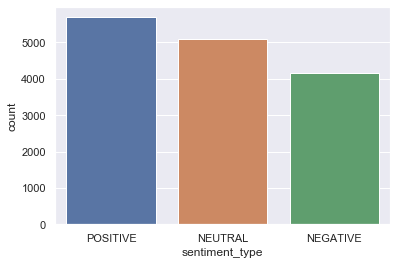

In [24]:
# countplot of all above values (positive,neutral,negative)
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x=tweets['sentiment_type'])

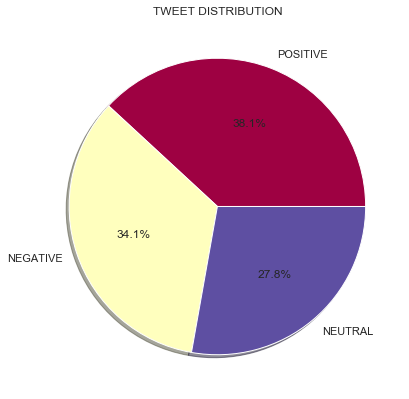

In [25]:
#plotting piechart with specific size 

import numpy as np
from matplotlib.gridspec import GridSpec
targetCounts = tweets.sentiment_type.value_counts()
targetLabels  =['POSITIVE', 'NEGATIVE', 'NEUTRAL']
# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='TWEET DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

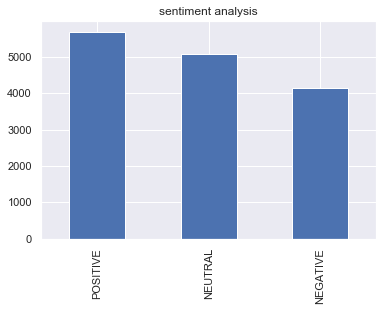

In [26]:
#plotting bargraph(positive,neutral,negative)

tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [27]:
#char_mask = np.array(Image.open("C:/Users/aarek/OneDrive/Pictures/twitter1.png"))
#sudo apt-get install python3-tk



from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud
#import string

Stop_Words = set(stopwords.words('english')+['``',"''","MrU092DU093EU0935U0941U0915",
                    "edU00A0U00BDedU00B8U00A9edU00A0U00BDedU00B8U00A5edU00A0U00BDedU00B8U00A2edU00A0U00BDedU00B8U00AD"])




totalWords = []
tweets_text = tweets['cleaned'].values
cleanedSentences = ""
for x in range(1,len(tweets['cleaned'])):
    cleanedSentence = tweets['cleaned'][x]    
    cleanedSentences += cleanedSentence
    requiredWords = nltk.word_tokenize(cleanedSentence)
    for word in requiredWords:
        if word not in Stop_Words and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)

cloudstring=""
for word in (wordfreqdist):
    cloudstring += " "
    cloudstring += word


print(cloudstring)



 vote demonetization modi survey app former finsec rbi dy governor cbdt chair harvard professor lambaste aam aadmi listen th news gurugram haryana post office employees provide cash exchange patients hospitals co ugmxup reddy wed mail today caoon reddywedding u glnrq f india blackmoney symptom disease hsl ihj qe via ambazaarmag rs lakh loot bank kishtwar j amp k third incident since terrorists call nationalists join walk corruptionfreeindia spread benefit among mas many opposition leaders narendramodi respect decision suppo oppositio reform destroy even essence sagan instance urge give second though eyysireiuq b coz pay question narendra pm take feedback people strategy pygk rmg r bharat band ed bd protest different krishna effect zh explain try put word lace heavy technical cpiml prove govt totally indifferent mount misery hards gandhi ji hear stand nhek tpg operative sector kerala good tax black money hq swamy sue depend swiftly replenish currency pls avoid ba kausik doltiwal mean ja

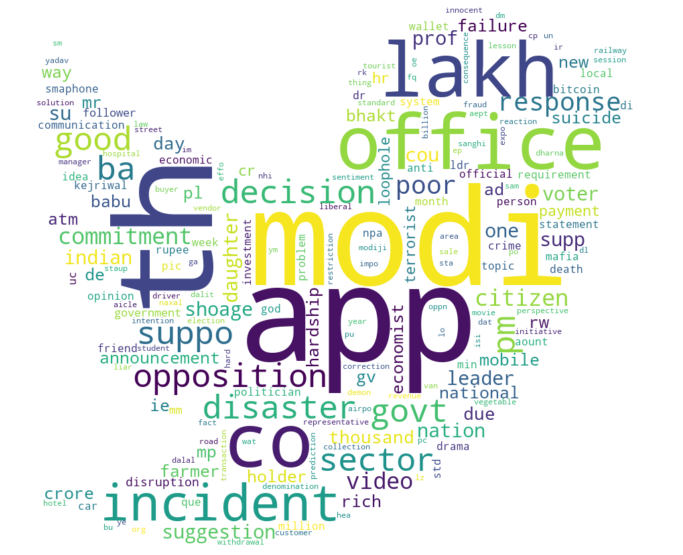

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

our_mask= np.array(Image.open("C:/Users/aarek/OneDrive/Desktop/twitter_mask.png"))

cloud = WordCloud(background_color = "white", max_words = 200, mask = our_mask,
                  stopwords = set(STOPWORDS)).generate(cloudstring)
  
plt.figure(figsize=(12,12))
plt.imshow(cloud ,interpolation='bilinear')
plt.axis('off')
plt.show()


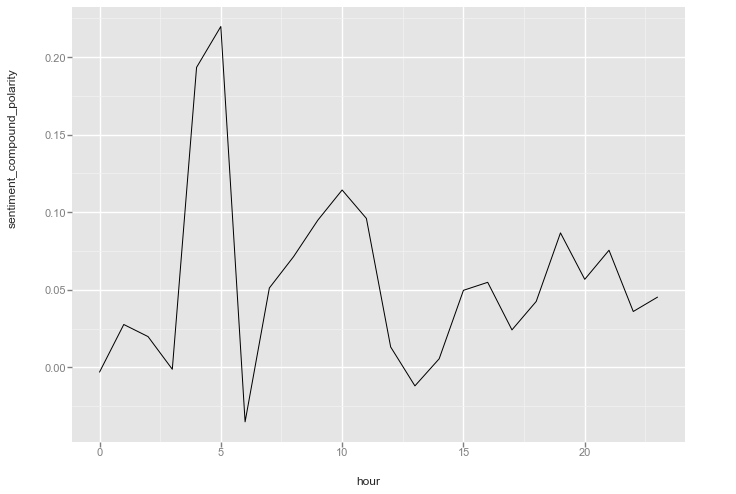

<ggplot: (-9223371948160914074)>


In [29]:

!pip install ggplot
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df_tweets=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
print(ggplot(aes(x='hour',y='sentiment_compound_polarity'),data=df_tweets)+geom_line())

The above trend looks like too much Ups & Downs according to time but at last it goses on towards positive sentiments

# Time-Series Ananlysis 

In [30]:
import numpy as np 
#import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [31]:
#Pre-process Data
#We create new columns namely hour, date & count for our analysis

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'date', 'count', 'retweetCount']]
tweets_filtered.head()

hour        date  count  retweetCount
0    18  2016-11-23      1           331
1    18  2016-11-23      1            66
2    18  2016-11-23      1            12
3    18  2016-11-23      1           338
4    18  2016-11-23      1           120

In [32]:
tweets.head()


Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   
3           4  4  RT @ANI_news: Gurugram (Haryana): Post office ...   
4           5  5  RT @satishacharya: Reddy Wedding! @mail_today ...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   
3      False              0       NaN  2016-11-23 18:39:59      False   
4      False              0       NaN  2016-11-23 18:39:39      False   

   replyToSID            id  ...  \
0         NaN  8.014957e+17  ...   
1         NaN  8.014957e+17  ...   
2         NaN  8.014955e+17  ...   
3         NaN  8.014955e+17  ...   
4         NaN  8.014954e+17  ...   

                                             cleaned  \
0   critical question paytm inform demonetization...   
1                vote demonetization modi survey app   
2   former finsec rbi dy governor cbdt chair harv...   
3   news gurugram haryana post office employees p...   
4   reddy wed mail today caoon demonetization red...   

  sentiment_compound_polarity sentiment_neutral  sentiment_negative  \
0                      0.1027             0.688               0.144   
1                      0.0000             1.000               0.000   
2                      0.0000             1.000               0.000   
3                      0.0000             1.000               0.000   
4                      0.0000             1.000               0.000   

   sentiment_positive  sentiment_type hour        date  minute  count  
0               0.169        POSITIVE   18  2016-11-23      40      1  
1               0.000         NEUTRAL   18  2016-11-23      40      1  
2               0.000         NEUTRAL   18  2016-11-23      40      1  
3               0.000         NEUTRAL   18  2016-11-23      39      1  
4               0.000         NEUTRAL   18  2016-11-23      39      1  

[5 rows x 26 columns]

In [33]:
#Tweets per hour
#Get number of tweets and re-tweets per hour

tweets_hourly = tweets_filtered.groupby(["hour"]).sum().reset_index()
tweets_hourly.head()

hour  count  retweetCount
0     0    222         31868
1     1    307         65764
2     2    342         53562
3     3    513         67820
4     4    602        247478

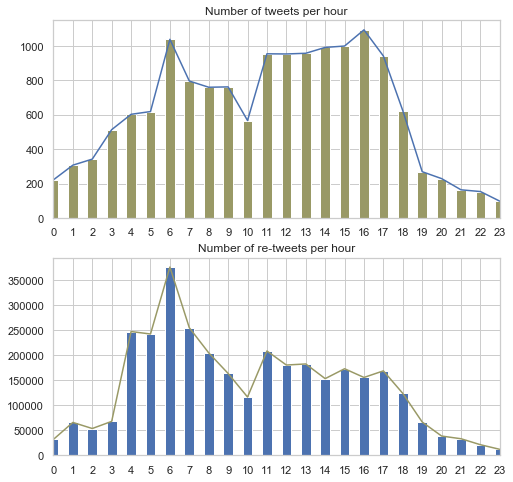

In [34]:
#Plot graph for number of Tweets/Re-Tweets per hour

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.title.set_text("Number of tweets per hour")
tweets_hourly["count"].plot.bar(ax=ax1, color='#999966')
tweets_hourly["count"].plot(ax=ax1)

ax2.title.set_text("Number of re-tweets per hour")
tweets_hourly["retweetCount"].plot.bar(ax=ax2)
tweets_hourly["retweetCount"].plot(ax=ax2, color='#999966')

In [35]:
#Tweets per hour for Dates
#Get number of tweets and re-tweets per hour on various dates

pivot_df = tweets_filtered.pivot_table(tweets_filtered, index=["date", "hour"], aggfunc=np.sum)
print(pivot_df)
dates = pivot_df.index.get_level_values(0).unique()

                 count  retweetCount
date       hour                     
2016-11-22 10       21          6058
           11      318         82888
           12      387         63582
           13      382         70898
           14      349         64110
           15      314         56379
           16      277         38631
           17      260         44812
           18      202         49493
           19       96         24644
           20       70         17301
           21       45          7385
           22       40          5954
           23       25          6991
2016-11-23 0        76         10070
           1        93         21082
           2       107         18859
           3       175         22033
           4       195         21233
           5       221         20021
           6       595        176130
           7       427         84026
           8       425         60479
           9       482         75095
           10      277         39148
 

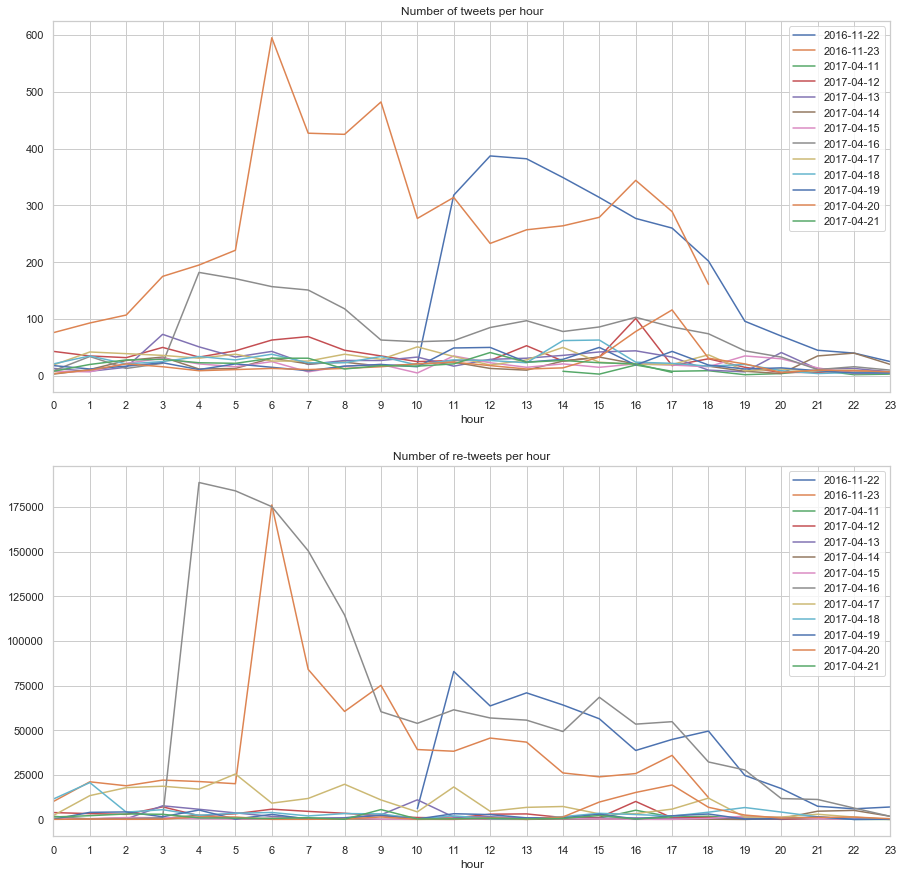

In [36]:
#Lets plot the graph for all dates

f, ax = plt.subplots(2, 1, figsize=(15, 15))
plt.setp(ax, xticks=list(range(0,24)))

ax[0].title.set_text("Number of tweets per hour")
ax[1].title.set_text("Number of re-tweets per hour")

for date in dates:
    split = pivot_df.xs(date)
    
    split["count"].plot(ax=ax[0], legend=True, label='' + str(date))
    split["retweetCount"].plot(ax=ax[1], legend=True, label='' + str(date))

As we can see in above trend both "Number of tweets per hour" & "Number of re-tweets per hour" going down among all dates
but still retweets are going up in the last.